In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("/Users/manas/Downloads/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

df.describe(include='all')

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))

print("\n--- Value Counts ---")
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB
None

--- Descriptive Statistics ---
          Survived      Pclass         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN    

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


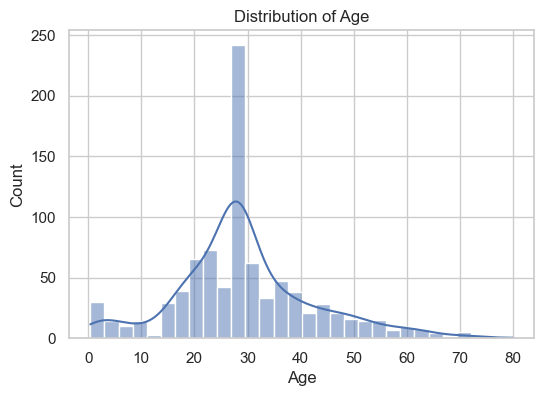

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribution of Age")
plt.show()


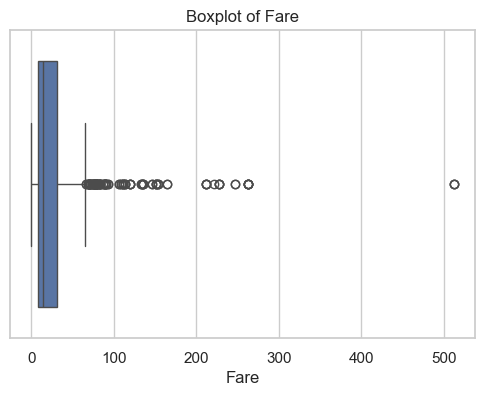

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()


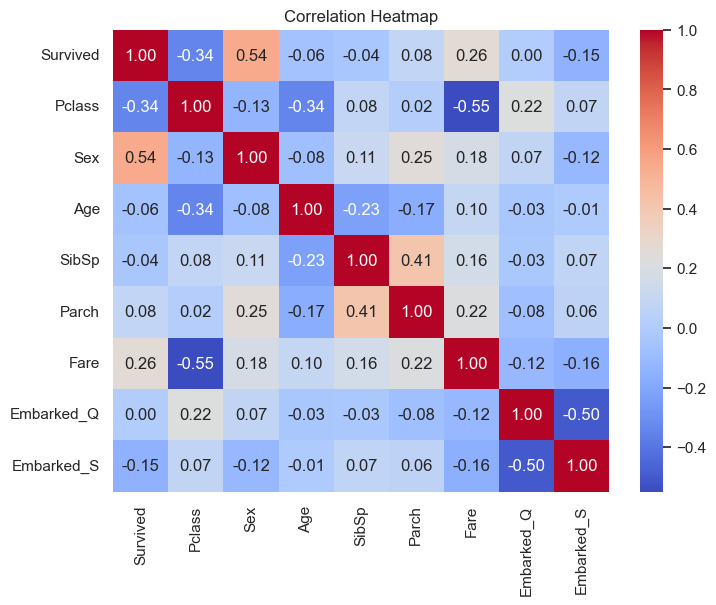

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


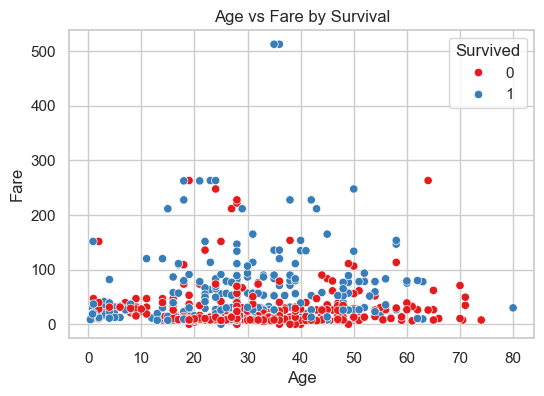

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='Set1')
plt.title("Age vs Fare by Survival")
plt.show()


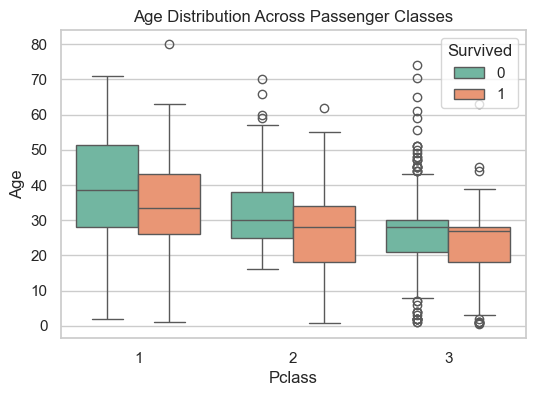

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived', palette='Set2')
plt.title("Age Distribution Across Passenger Classes")
plt.show()


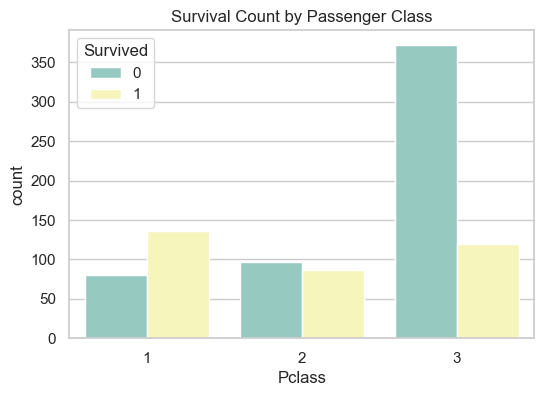

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set3')
plt.title("Survival Count by Passenger Class")
plt.show()
